Notes: 
- https://frankfletcher.notion.site/CNN-Talk-11871b81f4ae8087a7a0c66f064ac285
- https://deeplizard.com/resource/pavq7noze2


Key Concepts I want you to pull from the lecture:
1. The concept of a NN "head" (Fully Connected Processing Layers) and "tail" (the input-specific processing layers)

2. The idea that a CNN just inserts an image (pre)processing section into a standard MLP.  The MLP is the head and the CNN blocks make up the tail.

3. The concept of having blocks of NN layers.  A standard convolutional block is made up of:
 - Convolutional Layer
 - Activation Layer (non-linear)
 - A Pooling Layer
 - An optional Batch Norm Layer

4. A Pooling Layer is a form of compression that shrinks a feature map to a smaller size by running a max or averaging window across the feature map

5. Batch Normalization is a kind of standardization that operates on the output of a layer
 - Whether to have batch norm be before or after the activation function is actually under some academic debate.  So be prepared to see it in both locations.
 - Aside from rescaling the data, BN has a regularizing effect, improves the efficiency of the model and can let you use higher learning rates.

6. The idea of non-linearity and the role of ReLU as an activation function. 

7. Output activation functions for categorization: Sigmoid and SoftMax  https://keras.io/api/layers/activations/#sigmoid-function and https://keras.io/api/layers/activations/#softmax-function 

8. Loss Functions for categorization: Binary Cross Entropy and Categorical Cross Entropyhttps://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class and  https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class

9. What features are and how they develop from simple edges to rounded edges to complex edges to something almost like images.

10. The most common error in neural network coding is shape mismatch. 

11. What the argmax() function does: It finds the index of the largest value in an array

12. Images are typically 3-dimensional data. It has a width a height and n number of channels. The channels generally represent the colors. Most processing assigns colors in RGB order, but sometimes it's in another order (BGR is standard with opencv)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# loading an image

In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
img = image.load_img('flower.jpg', target_size=(224,224)) # fit image into 
target_size=(224,224)

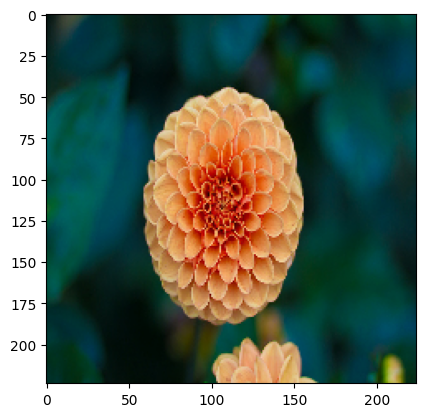

In [4]:
plt.imshow(img)

In [5]:
img_array = image.img_to_array(img)
img_array.shape

(224, 224, 3)

the max is 255 --> normalize

In [6]:
img_array/255.0

array([[[0.01176471, 0.07058824, 0.05098039],
        [0.02352941, 0.08235294, 0.05490196],
        [0.03137255, 0.09019608, 0.07843138],
        ...,
        [0.        , 0.31764707, 0.29411766],
        [0.        , 0.30588236, 0.25490198],
        [0.        , 0.29803923, 0.2509804 ]],

       [[0.02352941, 0.07450981, 0.04705882],
        [0.01960784, 0.08627451, 0.05490196],
        [0.02745098, 0.09019608, 0.07843138],
        ...,
        [0.        , 0.30980393, 0.28627452],
        [0.        , 0.29803923, 0.25882354],
        [0.00392157, 0.2901961 , 0.2627451 ]],

       [[0.03137255, 0.07843138, 0.0627451 ],
        [0.01960784, 0.08627451, 0.0627451 ],
        [0.02745098, 0.09019608, 0.07843138],
        ...,
        [0.        , 0.3019608 , 0.2784314 ],
        [0.00392157, 0.2901961 , 0.2627451 ],
        [0.00392157, 0.28235295, 0.25882354]],

       ...,

       [[0.00784314, 0.19215687, 0.16862746],
        [0.00784314, 0.19215687, 0.16078432],
        [0.        , 0

read image, load, convert to array, normalize, list or array

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [8]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Display images

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

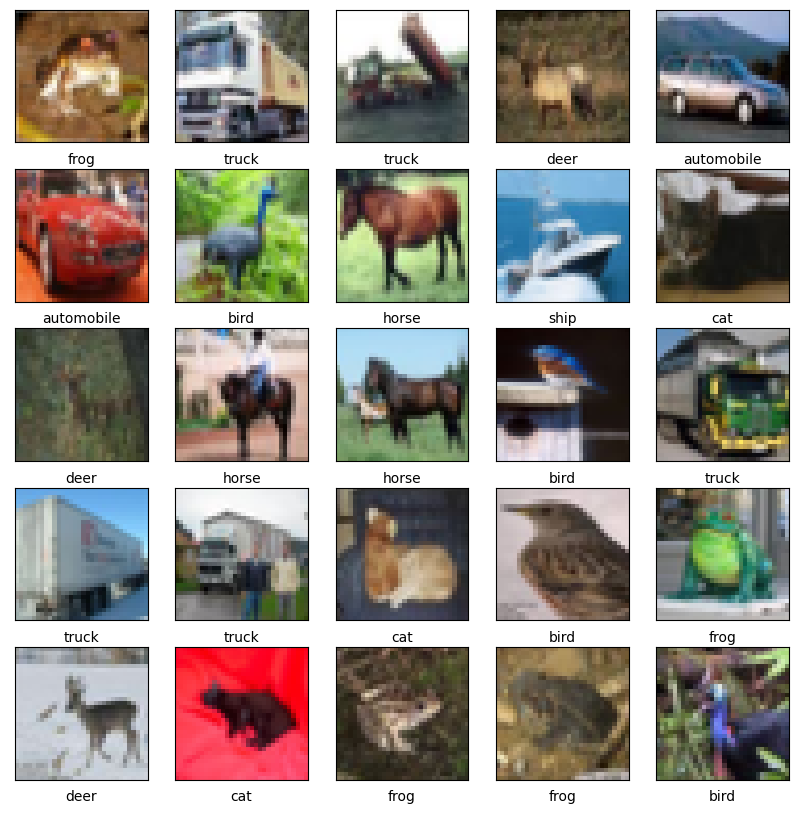

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/Users/yanellyhernandez/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3522 - loss: 1.7534 - val_accuracy: 0.5294 - val_loss: 1.3095
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5623 - loss: 1.2301 - val_accuracy: 0.6076 - val_loss: 1.0996
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6332 - loss: 1.0449 - val_accuracy: 0.6578 - val_loss: 0.9936
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6691 - loss: 0.9396 - val_accuracy: 0.6749 - val_loss: 0.9375
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6948 - loss: 0.8683 - val_accuracy: 0.6684 - val_loss: 0.9612
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7214 - loss: 0.8023 - val_accuracy: 0.6812 - val_loss: 0.9145
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7369 - loss: 0.7484 - val_accuracy: 0.6941 - val_loss: 0.8814
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7522 - loss:

# Evaluation

313/313 - 1s - 3ms/step - accuracy: 0.7104 - loss: 1.1026


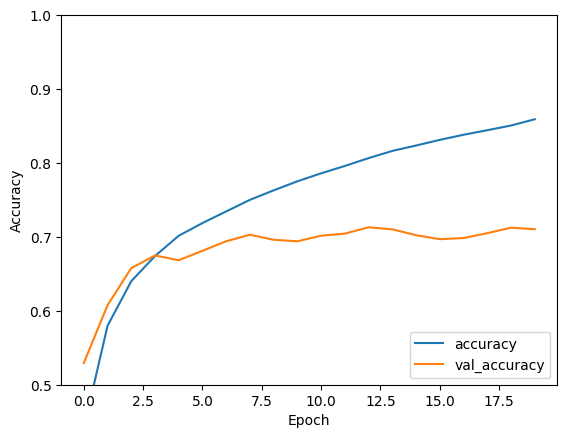

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
pred= model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
pred.shape

(10000, 10)

In [21]:
np.argmax(pred[0])

3

In [22]:
test_labels[0]

array([3], dtype=uint8)

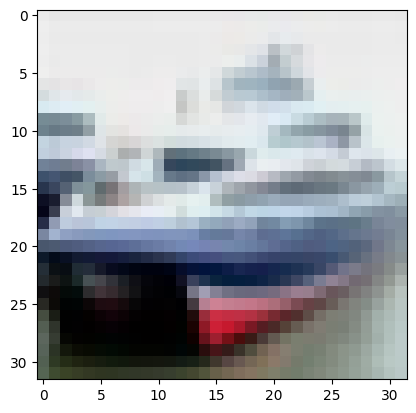

In [23]:
plt.imshow(test_images[1])

In [24]:
# for x in range(len(pred)):
#     print(class_names[np.argmax(pred[x])])
# print this more efficently and faster then above    
predicted_classes = [class_names[np.argmax(p)] for p in pred]
print(predicted_classes)


['cat', 'ship', 'truck', 'airplane', 'frog', 'frog', 'automobile', 'deer', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'frog', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'airplane', 'truck', 'deer', 'dog', 'deer', 'deer', 'truck', 'frog', 'frog', 'dog', 'deer', 'cat', 'truck', 'cat', 'horse', 'automobile', 'truck', 'dog', 'deer', 'frog', 'dog', 'frog', 'ship', 'truck', 'cat', 'cat', 'horse', 'frog', 'airplane', 'ship', 'horse', 'frog', 'ship', 'ship', 'horse', 'horse', 'cat', 'dog', 'horse', 'cat', 'deer', 'cat', 'bird', 'bird', 'automobile', 'bird', 'cat', 'horse', 'bird', 'frog', 'ship', 'ship', 'airplane', 'bird', 'horse', 'dog', 'cat', 'ship', 'ship', 'truck', 'automobile', 'horse', 'bird', 'horse', 'deer', 'airplane', 'ship', 'truck', 'airplane', 'frog', 'ship', 'frog', 'deer', 'frog', 'frog', 'airplane', 'airplane', 'dog', 'deer', 'horse', 'frog', 'cat', 'automobile', 'automobile', 'bird', 'frog', 'cat', 'horse', 'deer', 'airplane', 'bird', 'bird'

In [25]:
class_names[np.argmax(pred[5])]

'frog'

In [26]:
test_images[50]

array([[[0.58823529, 0.76862745, 1.        ],
        [0.57647059, 0.75294118, 0.98039216],
        [0.57647059, 0.75294118, 0.98039216],
        ...,
        [0.4627451 , 0.65098039, 0.91372549],
        [0.46666667, 0.65490196, 0.89803922],
        [0.44705882, 0.63137255, 0.88235294]],

       [[0.6       , 0.78039216, 0.99607843],
        [0.58823529, 0.76470588, 0.97647059],
        [0.58039216, 0.76078431, 0.97254902],
        ...,
        [0.5254902 , 0.68627451, 0.91372549],
        [0.45490196, 0.62745098, 0.87058824],
        [0.40784314, 0.6       , 0.87058824]],

       [[0.62745098, 0.81176471, 1.        ],
        [0.61960784, 0.8       , 0.99607843],
        [0.60784314, 0.78823529, 0.98431373],
        ...,
        [0.56862745, 0.72156863, 0.93333333],
        [0.51764706, 0.68627451, 0.93333333],
        [0.43137255, 0.62745098, 0.90980392]],

       ...,

       [[0.48235294, 0.49019608, 0.45098039],
        [0.45098039, 0.45882353, 0.41960784],
        [0.4627451 , 0

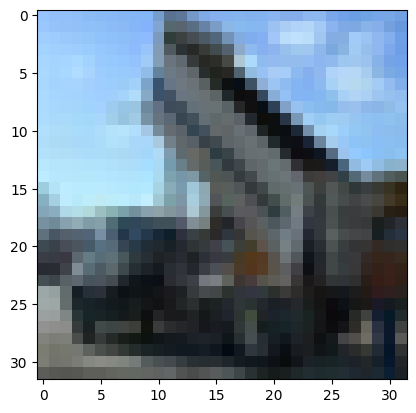

In [27]:
plt.imshow(test_images[50])

In [28]:
test_imag = test_images[50]

In [29]:
test_imag.shape

(32, 32, 3)

In [30]:
np.expand_dims(test_imag, axis=0).shape

(1, 32, 32, 3)

In [31]:
test_imag_final = np.expand_dims(test_imag, axis=0)
test_imag_final.shape

(1, 32, 32, 3)

In [32]:
np.argmax(model.predict(test_imag_final))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


0

In [ ]:
predicted_label = class_names[np.argmax(model.predict(test_imag_final))]
print(predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
airplane
